z_global:
  Total examples: 59517
  Minimum:        -1.000385
  Maximum:        1.000385

y_local:
  Total examples: 59517
  Minimum:        -0.535294
  Maximum:        1.002941

adjusted_hit_time:
  Total examples: 59517
  Minimum:        -0.451666
  Maximum:        20.712933



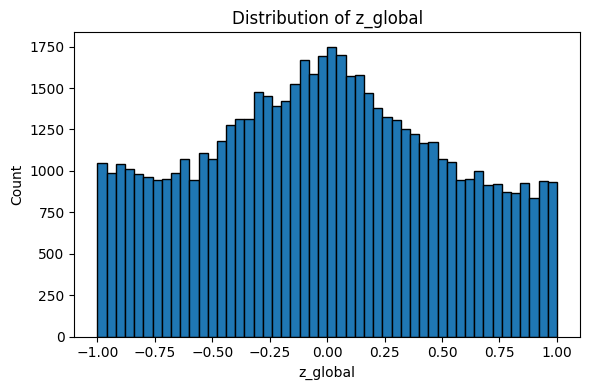

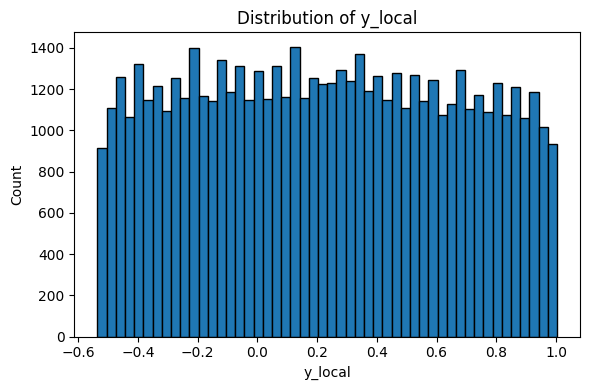

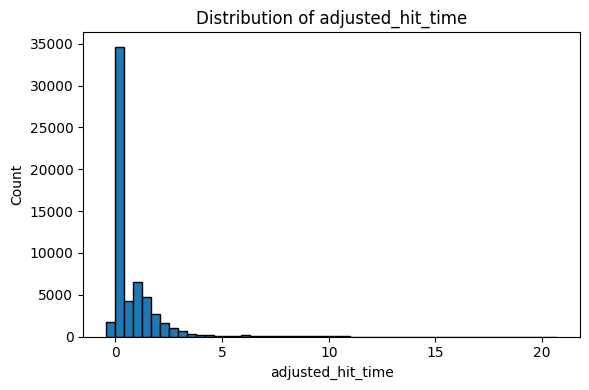

In [19]:
#!/usr/bin/env python3
import os
import glob

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from OptimizedDataGenerator4 import OptimizedDataGenerator

# ————————————————————————————————————————————————
# 1) Change this to your TFRecords folder
TFRECORDS_DIR = "/home/youeric/PixelML/smart-pixels-ml/filtering_models/filtering_records2000/tfrecords_train"
# ————————————————————————————————————————————————

# 2) List here whatever features you want to extract & plot
FEATURES = ['z_global', 'y_local', 'adjusted_hit_time']

def collect_features(tfrecords_dir, batch_size=2000, x_features=None):
    """
    Uses OptimizedDataGenerator in load-records mode,
    returning a dict mapping each feature name to a 1D numpy array
    of all its values across the dataset.
    """
    if x_features is None:
        x_features = FEATURES

    gen = OptimizedDataGenerator(
        load_records           = True,
        tf_records_dir         = tfrecords_dir,
        x_feature_description  = x_features,
        batch_size             = batch_size,
    )

    # prepare a list buffer for each feature
    data = {feat: [] for feat in x_features}

    # iterate over every TFRecord batch
    for i in range(len(gen)):
        X_batch, _ = gen[i]
        for feat in x_features:
            # flatten [batch_size, …] → 1D
            arr = X_batch[feat].numpy().reshape(-1)
            data[feat].append(arr)

    # concatenate all batches into single arrays
    for feat in x_features:
        data[feat] = np.concatenate(data[feat], axis=0)

    return data

def main():
    data = collect_features(TFRECORDS_DIR)

    # print stats for each feature
    for feat, arr in data.items():
        print(f"{feat}:")
        print(f"  Total examples: {arr.size}")
        print(f"  Minimum:        {arr.min():.6f}")
        print(f"  Maximum:        {arr.max():.6f}")
        print()

    # plot each distribution in its own separate figure
    for feat in FEATURES:
        plt.figure(figsize=(6, 4), dpi=100)
        plt.hist(data[feat], bins=50, edgecolor='black')
        plt.xlabel(feat)
        plt.ylabel("Count")
        plt.title(f"Distribution of {feat}")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()
